# 泰坦尼克号生还者分析  
  

泰坦尼克号的沉没可以说是世纪悲剧，这艘号称“永不沉没”的巨轮还是带着无数的秘密和宝藏沉没于北大西洋的海面上。这艘运载着两千多人的巨轮，最后存活下来的只有705人，那么这存活下来的七百多人，他们究竟有没有什么共性呢？

In [1]:
#导入所需要的库

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 数据整理  
## 数据初探
为了熟悉数据，我打印出了表格的前5行。

In [2]:
#加载数据集，并打印出前5行

titanic_df = pd.read_csv('titanic_data.csv')

print titanic_df.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


可以看到每位乘客的数据包括12项内容：
- PassengerId：乘客序号；
- Survived：是否生还（1表示生还，0表示死亡）；
- Pclass：舱位，虽然前5名乘客的‘Pclass’只看到了1和3，但是按照常识推测：起码应为1、2、3，分别为头等舱、二等舱、三等舱；
- Name：乘客姓名；
- Sex：乘客性别；
- Age：乘客年龄；
- SibSp：一同上船的兄弟姐妹或配偶的人数；
- Parch：一同上船的父母或子女的人数；
- Ticket：船票信息；
- Fare：船票价格，决定了Pclass的等级；
- Cabin：客舱编号，不同的编号对应不同的位置；
- Embarked：上船地点  
  
初步分析来看，乘客序号和上船地点和乘客的生还率是没有直接关联的。舱位、乘客姓名、船票信息、票价、客舱编号其实都可以用舱位这个变量来统一说明（降维），乘客姓名会显示出此名乘客的社会阶级地位，一般来讲，贵族（名字很长）都会选择头等舱，而平民一般都是二等舱或者三等舱，那么票价、船票信息、客舱编号都是随之变化的，因此最能简洁反映不同的就是舱位。  
分析之后，可以看出，猜想到的影响因素有：  
- Pclass
- Sex
- Age
- SibSp
- Parch

In [5]:
all_column = pd.Series(list(titanic_df))
all_column

0     PassengerId
1        Survived
2          Pclass
3            Name
4             Sex
5             Age
6           SibSp
7           Parch
8          Ticket
9            Fare
10          Cabin
11       Embarked
dtype: object

In [6]:
all_column[all_column.duplicated()]

Series([], dtype: object)

## 缺省值检测和处理

In [3]:
#检查各个特征中，有没有缺省值
print titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


这里总共有‘Age’、‘Cabin’、‘Embarked’，这三个特征有缺省值，不过后两个特征在后面的分析中用不上，所以暂不做处理，下面就来处理‘Age’的缺省值。 

对于缺省值，如果几百条数据，只是缺少几条的话，我们确实可以直接做丢弃处理。但这里的差不多缺省了20%，直接丢弃就貌似太粗暴了，因此还是将缺省值做填充处理，更为稳妥。  

先来查看下‘Age’的数据分布。

In [4]:
#先列出重要的数据特征值
print titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


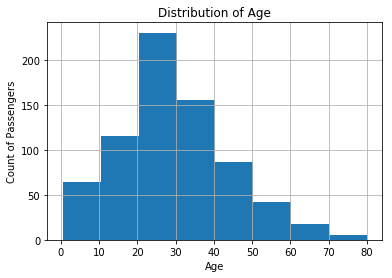

In [5]:
#再用直方图来表示年龄分布
titanic_df['Age'].hist(bins=8)

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')

结合上面两个结果，可以看出年龄在20到30之间的人数最多，平均数为29岁，中位数为28岁。因此考虑填充缺省值就用平均年龄即可。

In [6]:
#用平均数来填充缺省值
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

#‘Age’特征的缺省值已被填充好
print titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


## 异常值检测  

在检查异常值的时候，对需要分析的特征做一个简单的统计即可，主要就是查看各项有没有“离群值”。假如年龄的最大值为160岁，那一定是有问题的。不过年龄在上面处理缺省值的时候已经看到了，没有异常值，因此只需要检查剩下的四个特征即可。 

In [7]:
#查看‘Pclass’
titanic_df['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

最小值为1，最大值为3，看来就是1、2、3，分别代表头等舱、二等舱、三等舱。三等舱的人数是最多的。

In [8]:
#查看‘Sex’
titanic_df['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

数据中只有两类数据，最多的是‘male’，那么另一个一定是‘female’了。

In [9]:
#查看‘SibSp’
titanic_df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

最小值为0，最大值为8，范围合理，没有异常值。大多数人还是独身出行或者是二人同行。

In [10]:
#查看‘Parch’
titanic_df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

最小值为0，最大值为6，范围合理，没有异常值。独自出行还是占大多数。  

这几项经检查，都没有发现异常值，下面检查是否有重复记录。

## 检查是否有重复值

In [11]:
#利用duplicated函数检查是否有重复值
records = titanic_df.duplicated()
print records.describe()

count       891
unique        1
top       False
freq        891
dtype: object


看来records中只有一个元素，就是False，也就是说并没有重复值。但是当时查看资料时显示，泰坦尼克号总共的乘客加船员是两千多名，可这份记录只有891条，猜想可能是有很多人遇难者没有打捞上来，或者身份无从查证吧。或者这份表格可能对一些资料极其不全的记录条目，已经事先处理了一下了。  

现在数据清理工作已经差不多了，下面开始进行数据分析。

# 数据分析  


In [12]:
#计算总生还率
survived_rate = titanic_df['Survived'].mean()

print survived_rate

0.383838383838


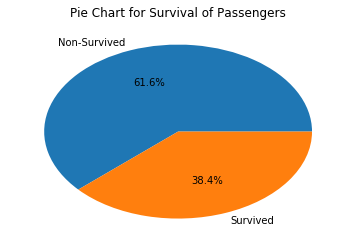

In [13]:
#借鉴审阅中的代码，用饼图绘制生还人数所占的比例
by_Survived = titanic_df.groupby(['Survived']).size()
plt.pie(by_Survived, labels = ['Non-Survived','Survived'], autopct='%.1f%%')
plt.title('Pie Chart for Survival of Passengers')

可以看出，总的生还率是38.4%。

下面就来逐个分析各个因素对于生还率的影响，为了简练，首先创建一个分组函数。

In [14]:
#创建一个分组函数。并且计算各个组里条目的数量。

def get_group(feature):
    grouped_data = titanic_df.groupby(feature)
    distribution_data = grouped_data.size()
    
    return grouped_data, distribution_data    

## ‘Pclass’对于生还率的影响

Pclass
1    216
2    184
3    491
dtype: int64


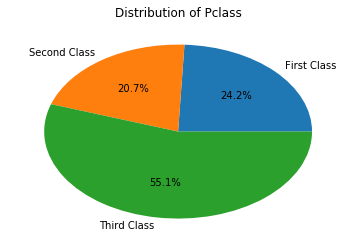

In [15]:
grouped_pclass, distribution_pclass = get_group('Pclass')

#打印出各舱的人数
print distribution_pclass

#将结果可视化
plt.pie(distribution_pclass, labels = ['First Class','Second Class', 'Third Class'], autopct='%.1f%%')
plt.title('Distribution of Pclass')

可以看出，舱位等级分布就是之前推测的1、2、3，分别代表头等舱、二等舱、三等舱。可以看出船上还是平民多，那可否**推测** *平民的生还人数最多呢？*  

下面来查看生还人数及生还率。

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


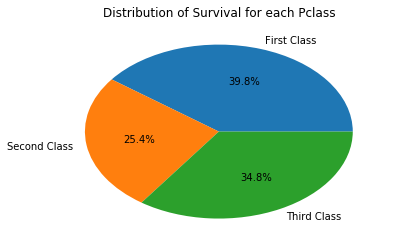

In [16]:
#打印出各等级船舱的生还人数以及在生还者中所占比重
survival_pclass = grouped_pclass['Survived'].sum()
print survival_pclass

#将结果可视化
plt.pie(survival_pclass, labels = ['First Class','Second Class', 'Third Class'], autopct='%.1f%%' )
plt.title('Distribution of Survival for each Pclass')

可以看出，虽然三等舱的客人人数最多，但是生还人数却不如头等舱的客人，还是富人的生还率更高。  

正如上次审阅中提示到的，考虑到样本大小的生还率 = 该群体生还人数/总生还人数  

下面查看下每个群体内的生还率为多少。画图的时候，我参照了网上关于[多组条形图的画法](pythonspot.com/en/matplotlib-bar-chart/)。

In [17]:
print grouped_pclass['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [22]:
#创建一个可视化函数
def visualization(n_groups, survived, not_survived):
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8
 
    plt.bar(index, survived, bar_width,
            alpha=opacity,
            color='g',
            label='Survived')
 
    plt.bar(index + bar_width, not_survived, bar_width,
            alpha=opacity,
            color='b',
            label='Not-Survived')
    
    return index+bar_width

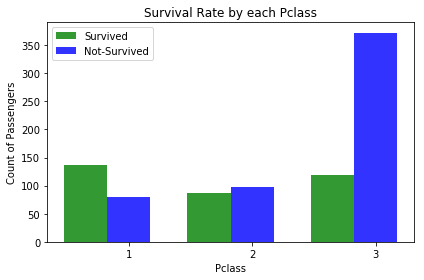

In [23]:
#得到数据点--每级客舱的生还及遇难人数
pclass_survived = grouped_pclass['Survived'].sum()
pclass_not_survived = grouped_pclass['Survived'].count()-grouped_pclass['Survived'].sum()
 
# 设置图形参数，创建图形
distance = visualization(3, pclass_survived, pclass_not_survived)
 
plt.xlabel('Pclass')
plt.ylabel('Count of Passengers')
plt.title('Survival Rate by each Pclass')
plt.xticks(distance, ('1', '2', '3'))
plt.legend()
 
plt.tight_layout()
plt.show()

可以看出，在各自的组别中，三等舱的生还率更少了，比平均生还率还低。而头等舱的多一半人都得以生还。

## ‘Sex’对于生还率的影响

Sex
female    314
male      577
dtype: int64


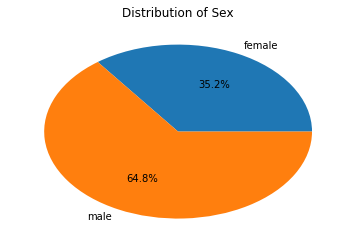

In [24]:
grouped_sex, distribution_sex = get_group('Sex')

#打印出男性和女性的人数
print distribution_sex

#将结果可视化
plt.pie(distribution_sex, labels = ['female','male'], autopct='%.1f%%')
plt.title('Distribution of Sex')

可以看出船上男性乘客差不多是女性乘客的两倍，按照当时社会风貌，这个很好理解，女性大约是不可能独自旅行的。那么能否像上面一样**推测** *男性乘客的生还人数大于女性人数呢？*  

下面来查看生还人数及生还率。

Sex
female    233
male      109
Name: Survived, dtype: int64


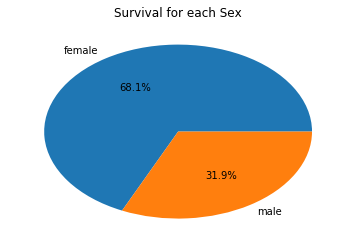

In [25]:
survival_sex = grouped_sex['Survived'].sum()
print survival_sex

plt.pie(survival_sex, labels=['female', 'male'], autopct='%.1f%%')
plt.title('Survival for each Sex')

可以看出女性乘客的生还人数和生还率都要远远大于男性乘客。看来上面的推测又错了。  

那么，继续查看各自群体内的生还率。

In [26]:
print grouped_sex['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


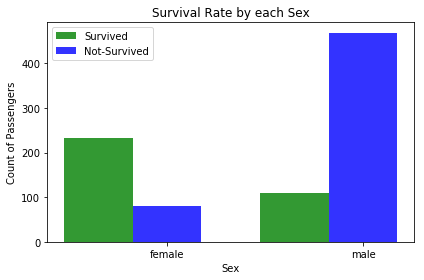

In [27]:
#得到数据点--每级客舱的生还及遇难人数
sex_survived = grouped_sex['Survived'].sum()
sex_not_survived = grouped_sex['Survived'].count()-grouped_sex['Survived'].sum()
 
# 创建图形
distance = visualization(2, sex_survived, sex_not_survived)
 
plt.xlabel('Sex')
plt.ylabel('Count of Passengers')
plt.title('Survival Rate by each Sex')
plt.xticks(distance, ('female', 'male'))
plt.legend()
 
plt.tight_layout()
plt.show()

可以看出很大部分（约74%）的女性乘客都生还了，但是对于男乘客，只有约20%生还。  

那么对于这些生还的女性，究竟是贵族居多还是平民居多呢？下面就来探查一下。

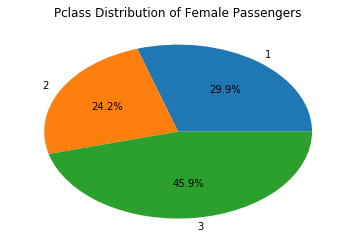

In [28]:
#女性乘客中，Pclass的分布情况
plt.pie(titanic_df[titanic_df['Sex'] == 'female'].groupby('Pclass').size(),
        labels=['1', '2', '3'],autopct='%.1f%%')
plt.title('Pclass Distribution of Female Passengers')

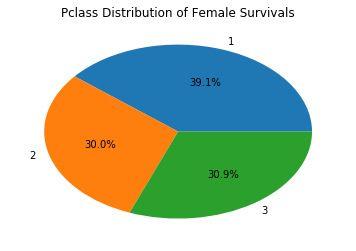

In [30]:
#生还的女性乘客中，Pclass的分布情况
plt.pie(titanic_df[np.logical_and(titanic_df['Survived']==1, titanic_df['Sex']=='female')].groupby('Pclass').size(),
        labels=['1', '2', '3'],autopct='%.1f%%')
plt.title('Pclass Distribution of Female Survivals')

In [29]:
#每个Pclass内，女性的人数
print titanic_df[titanic_df['Sex'] == 'female'].groupby('Pclass').size()

#每个Pclass内，女性的生还人数和生还率
print titanic_df[titanic_df['Sex'] == 'female'].groupby('Pclass')['Survived'].sum()
print titanic_df[titanic_df['Sex'] == 'female'].groupby('Pclass')['Survived'].mean()

Pclass
1     94
2     76
3    144
dtype: int64
Pclass
1    91
2    70
3    72
Name: Survived, dtype: int64
Pclass
1    0.968085
2    0.921053
3    0.500000
Name: Survived, dtype: float64


上面两张饼图表示出了“女性乘客中，Pclass的分布情况”和“生还的女性乘客中，Pclass的分布情况”。可以看出，生还女性中的等级分布还是比较均匀的，看来那时候的人们，在求生面前，算是比较平等的了，并没有区别贵贱。不过在各自的群体中，平民女性的生还率只有一半，而贵族（头等舱）或者中产阶级（二等舱）女性几乎全部生还，尤其是二等舱的女性乘客人数仅为三等舱的一般，但是群体内的生还率却高出一倍。猜测有可能是三等舱人太多，逃生时非常混乱的原因。

## ‘Age’对生还率的影响

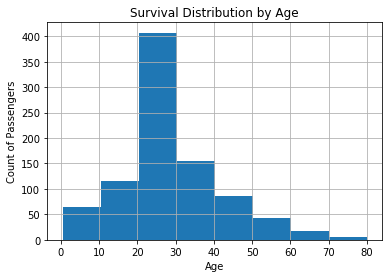

In [31]:
#查看处理完缺省值后的年龄分布

plt.hist(titanic_df['Age'], bins=8)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.grid(True)

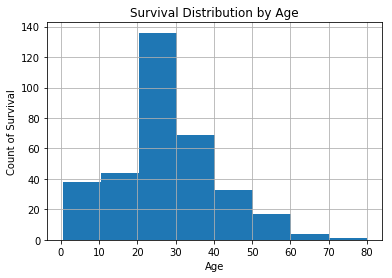

In [32]:
#只保留生还乘客的记录
survived_records = titanic_df[titanic_df['Survived'] == 1]

plt.hist(survived_records['Age'], bins=8)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count of Survival')
plt.grid(True)

可以看出，在生还者中，依旧是20到30岁的人数最多。这样看来，似乎是青年的生还率最高。最低的则是老人们。下面来看在各自的年龄群体中的生还率。

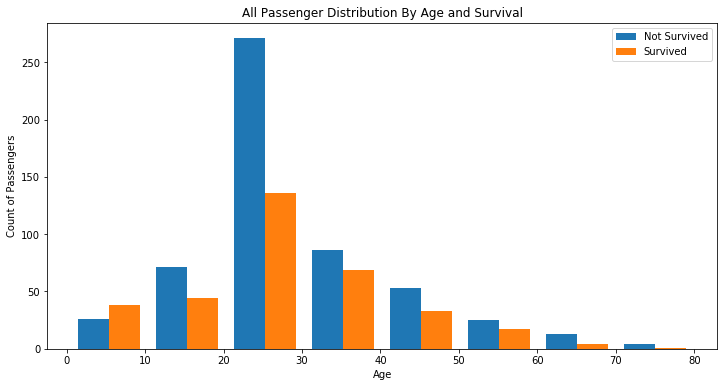

In [33]:
#按照是否生还，将年龄划分为两段。
age_not_survived = titanic_df[titanic_df.Survived == 0]['Age']
age_survived = titanic_df[titanic_df.Survived == 1]['Age']

#设置图形大小
plt.figure(figsize=(12, 6))

#将年龄分为8段，来画出图形
plt.hist([age_not_survived, age_survived], stacked=False, bins=8)
plt.title('All Passenger Distribution By Age and Survival')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.legend(['Not Survived', 'Survived'])
plt.show()

第一幅图表明，青年的生还人数最多。但是在各自的年龄群体中，发现生还率最高的其实是0到10岁的小孩，很重要的一个原因我想是因为样本空间不大，再加上救援一般都小孩和妇女优先的条件。相比较而言，青年在其群体内的生还率其实大约只有1/3，根据上面对于Pclass和Sex的分析，猜测此年龄段的遇难者可能是平民且为男性居多。而无论是生还人数所占比例，还是群体内的生还率，60岁以上老年人都很低，也许是自己意识到即使上了救生船，体力也很难维持到救援，因此选择等待死亡。

下面，我想重点研究一下10岁以下生还者的情况。

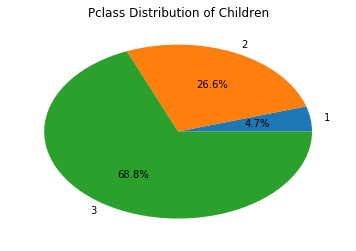

In [34]:
#小孩子们的Pclass分布
plt.pie(titanic_df[titanic_df['Age']<11].groupby('Pclass').size(), labels=['1','2','3'], autopct='%.1f%%')
plt.title('Pclass Distribution of Children')

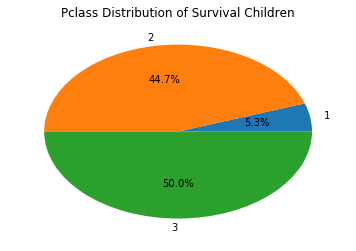

In [35]:
#生还的小孩子们的Pclass分布
plt.pie(titanic_df[np.logical_and(titanic_df['Age']<11, titanic_df['Survived'] == 1)].groupby('Pclass').size(), 
        labels=['1','2','3'], autopct='%.1f%%')
plt.title('Pclass Distribution of Survival Children')

In [36]:
#各Pclass内，小孩子的人数
print titanic_df[titanic_df['Age']<11].groupby('Pclass').size()

#各Pclass内，小孩子的生还人数
print titanic_df[titanic_df['Age']<11].groupby('Pclass')['Survived'].sum()

#各Pclass内，小孩子的生还率
print titanic_df[titanic_df['Age']<11].groupby('Pclass')['Survived'].mean()

Pclass
1     3
2    17
3    44
dtype: int64
Pclass
1     2
2    17
3    19
Name: Survived, dtype: int64
Pclass
1    0.666667
2    1.000000
3    0.431818
Name: Survived, dtype: float64


两张饼图，乍看之下似乎数据分布差不太多，但是当打出实际人数时，却发现了和女性乘客生还率一样的事实，那就是平民群体内的生还率依旧没有贵族高，二等舱的几乎全部生还，一等舱虽然看起来不高，其实只有三人，遇难一人而已。看来Pclass真的是很重要的一个相关因素。  

下面查看一下生还者中男性的特征。

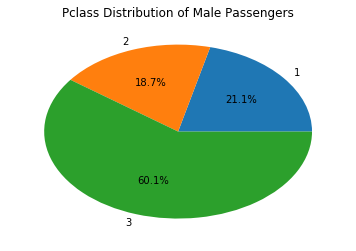

In [37]:
#男性乘客的Pclass分布
plt.pie(titanic_df[titanic_df['Sex']=='male'].groupby('Pclass').size(), autopct='%.1f%%', labels=['1','2','3'])
plt.title('Pclass Distribution of Male Passengers')

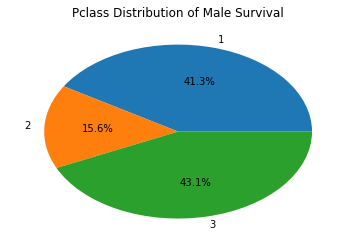

In [38]:
#生还男性中的Pclass分布
plt.pie(titanic_df[np.logical_and(titanic_df['Sex']=='male',titanic_df['Survived']==1)].groupby('Pclass').size(), 
        autopct='%.1f%%', labels=['1','2','3'])
plt.title('Pclass Distribution of Male Survival')

In [191]:
#各Pclass内，男性的人数
print titanic_df[titanic_df['Sex']=='male'].groupby('Pclass').size()

#各Pclass内，男性的生还人数
print titanic_df[titanic_df['Sex']=='male'].groupby('Pclass')['Survived'].sum()

#各Pclass内，男性的生还率
print titanic_df[titanic_df['Sex']=='male'].groupby('Pclass')['Survived'].mean()

Pclass
1    122
2    108
3    347
dtype: int64
Pclass
1    45
2    17
3    47
Name: Survived, dtype: int64
Pclass
1    0.368852
2    0.157407
3    0.135447
Name: Survived, dtype: float64


两张图的分布趋势依（百分百大小）并没有变化，只是分布面积有了显著变化。虽然在生还者中，三等舱的男性人数最多，但其实相较于总体人数来说的话，却是最低的。不过即使是Pclass为1的男性，他们的生还率依旧没有平均生还率高。  

## ‘SibSp’和‘Parch’对生还率的影响

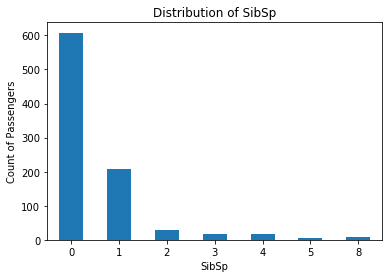

In [74]:
#查看‘SibSp’的数据分布
grouped_sibsp, distribution_sibsp = get_group('SibSp')

distribution_sibsp.plot(kind='bar', title='Distribution of SibSp', rot=0)
plt.ylabel('Count of Passengers')

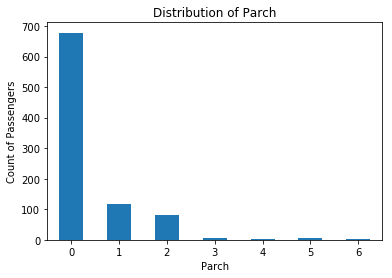

In [76]:
#查看‘Parch’的数据分布
grouped_parch, distribution_parch = get_group('Parch')

distribution_parch.plot(kind='bar',title='Distribution of Parch', rot=0)
plt.ylabel('Count of Passengers')

可以看出来，独行的人数还是很多的。

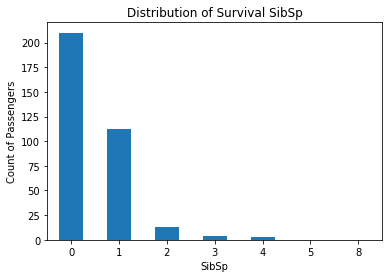

In [78]:
#查看生还者中‘SibSp’的分布
grouped_sibsp['Survived'].sum().plot(kind='bar', title='Distribution of Survival SibSp',rot=0)
plt.ylabel('Count of Passengers')

In [79]:
#查看‘SibSp’的分布人数
print distribution_sibsp

#查看生还者中‘SibSp’的分布人数
print grouped_sibsp['Survived'].sum()

#查看各‘SibSp’的生还率
print grouped_sibsp['Survived'].mean()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64
SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


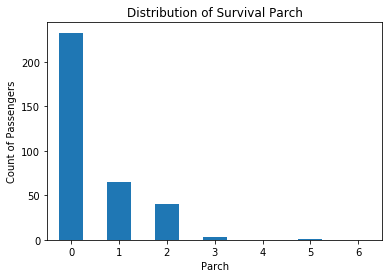

In [80]:
#生还者中‘Parch’的分布
grouped_parch['Survived'].sum().plot(kind='bar', title='Distribution of Survival Parch', rot=0)
plt.ylabel('Count of Passengers')

In [81]:
#‘Parch’的分布人数
print distribution_parch

#生还者中‘Parch’的分布人数
print grouped_parch['Survived'].sum()

#各‘Parch’的生还率
print grouped_parch['Survived'].mean()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64
Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


可以发现兄弟姐妹或配偶的人数和生还率基本是成反比的，生还率最高的其实是单独出行的乘客。至于群体内的生还率的高低，其实和样本大小是有很大关系的，因此单独查看每个群体的生还率时，会得出SibSp或者Parch为1到3的乘客生还率更高的结果。至于大家庭出行的乘客，生还率可以说是非常低了。  

下面来查看一下，这两项都为0，即独自出行的人的Sex分布。

Sex
female    126
male      411
dtype: int64


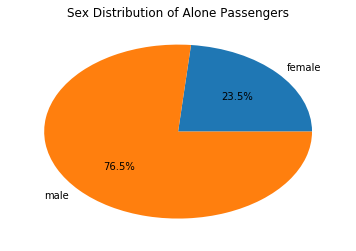

In [54]:
#独自出行的乘客的Sex分布
print titanic_df[np.logical_and(titanic_df['SibSp']==0, titanic_df['Parch']==0)].groupby('Sex').size()

plt.pie(titanic_df[np.logical_and(titanic_df['SibSp']==0, titanic_df['Parch']==0)].groupby('Sex').size(),
       autopct='%.1f%%', labels=['female','male'])
plt.title('Sex Distribution of Alone Passengers')

让我惊讶的一点是，当年独自出行的女性其实不少。

Sex
female    99
male      64
dtype: int64


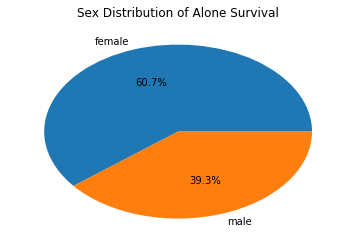

In [55]:
#独自出行的幸存者的Sex分布
survived_alone = titanic_df[titanic_df['Survived']==1]
print survived_alone[np.logical_and(survived_alone['SibSp']==0, survived_alone['Parch']==0)].groupby('Sex').size()

plt.pie(survived_alone[np.logical_and(survived_alone['SibSp']==0, survived_alone['Parch']==0)].groupby('Sex').size(),
       autopct='%.1f%%', labels=['female','male'])
plt.title('Sex Distribution of Alone Survival')

可以发现，生还的还是女性居多。    

# 总结  
  
综上所述：  
- 泰坦尼克号总的生还率是0.38。  
- 头等舱的乘客生还率最高，三等舱最低，但是就生还者的舱位分布情况来看，也并没有区分贵贱。  
- 女性乘客的生还率要远远大于男性乘客。 
- 0到10岁的小孩的生还率最高。  
- 独自出行的生还率更高。 

分析的局限性：  
- 根据报告开头所提到的，泰坦尼克号的船员加上乘客大约为两千多人（后来查资料，确切数字为2224），生还者只有705人。但是这份记录的人数只有891人，因此从数量上来说，记录条数不够一半，因此这份报告，确切来说没有办法代表整体人口。且实际的生还率为31.7%，但此份记录的生还率为38.4%，偏差约为21.1%，确实不是一个小的偏差，因此可能影响对于生还因素的分析，只能作为参考来看。  
- 特别的，记录中非常重要的特征“Age”是有缺省值的，大约占20%，也不是少部分了。在观察了数据分布后，决定用平均值填充缺省值，避免了对原数据分布的大趋势的影响。但我认为这样处理还是会对平均值所在区间的数据有些影响，会令分析结果有偏差。
- 除了报告中提现的那些变量，还有一个因素我认为也会有影响，那就是客舱距离逃生通道的远近。因为泰坦尼克号是在人们的都入睡的晚上撞上冰山的，因此大部分人都呆在了各自的客舱内，那么，距离逃生通道越近的人，生还率自然也比别人高。  
- 这篇报告虽然体现了很多特征与生还率的相关关系，但是严格来说并不能作为因果关系来看待。